Saving mall_customers.csv to mall_customers (2).csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,24,105,99
1,2,Female,42,16,9
2,3,Male,29,36,38
3,4,Female,42,47,41
4,5,Female,32,78,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


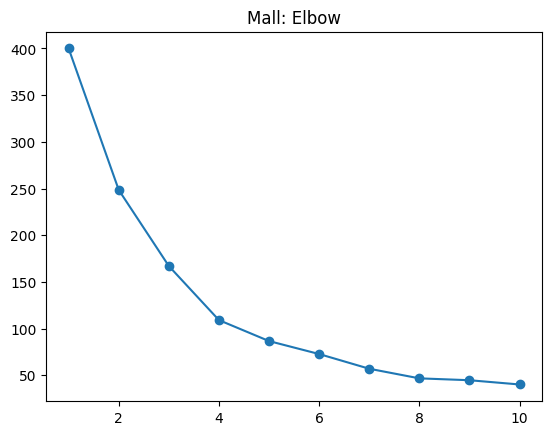

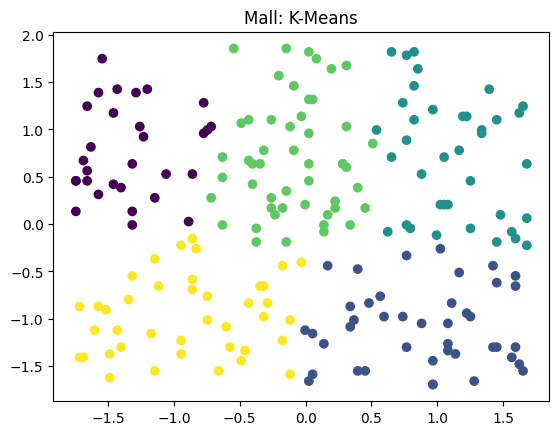

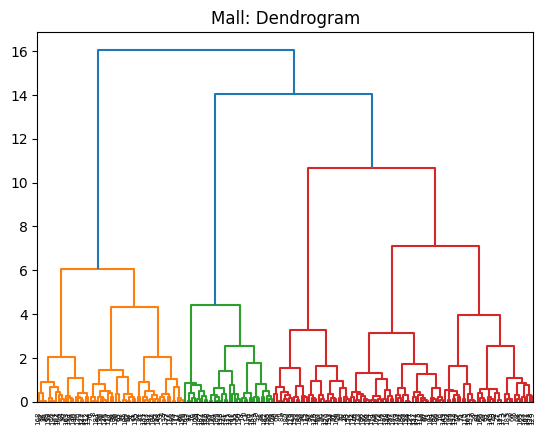

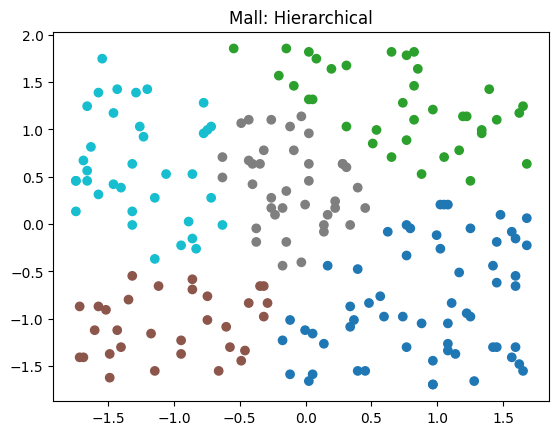

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from google.colab import files

files.upload()
df = pd.read_csv('mall_customers.csv')
display(df.head())
df.info()
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled = StandardScaler().fit_transform(X)
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Mall: Elbow')
plt.show()
km = KMeans(n_clusters=5, random_state=42)
labels = km.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('Mall: K-Means')
plt.show()
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title('Mall: Dendrogram')
plt.show()
clusters = fcluster(Z, 5, criterion='maxclust')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='tab10')
plt.title('Mall: Hierarchical')
plt.show()
